In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, f1_score
tf.random.set_seed(1)

### Sentiment Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

### Explore and Clean the Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import string
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Prog2/7282_1.csv")

In [ ]:
data.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [ ]:
data.sample(10)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
26689,Viale Garibaldi 24,Hotels,Silver Creek,US,45.496711,12.244640,Hotel Garibaldi,30173,GA,2014-06-05T00:00:00Z,2016-11-16T03:59:01Z,NaN,NaN,4.0,The service is good and the people are nice. T...,Good budget hotel,NaN,A Traveler,NaN
20521,442 E Bennett Ave,"Hotels,Hotel",Cripple Creek,US,38.746787,-105.173574,Double Eagle Hotel and Casino,80813,CO,2015-07-04T00:00:00Z,2017-03-15T18:59:03Z,NaN,NaN,2.0,We didn't stay at the hotel or go to the casin...,Coffee House is a RipOff,Rose Hill,Linda B,KS
14774,95 Route 17k,Hotels,Newburgh,US,41.505388,-74.073291,Howard Johnson Inn - Newburgh,12550-5009,NY,2014-08-21T00:00:00Z,2017-04-17T01:54:07Z,NaN,NaN,2.0,Clerk was polite but not welcoming in any way....,Great Staff and room rate,NaN,A verified traveler,NaN
32568,12825 Ventura Blvd,Hotels,Studio City,US,34.144791,-118.411550,Sportsmen's Lodge,91604,CA,2016-05-13T00:00:00Z,2016-10-29T18:26:20Z,NaN,NaN,1.0,I read great reviews and thought the location ...,Bad Retro,NaN,Stella,NaN
26627,2055 E 5th St,"Travel & Transport,Hotels,Hotels & Motels",Metropolis,US,37.162308,-88.690626,Super 8 Metropolis,62960,Round Knob,2015-07-26T00:00:00Z,2016-11-03T22:09:12Z,NaN,NaN,2.0,We arrived late in the evening after 14 hours ...,Outdated and not clean,Janesville,576russelll,WI
7791,2717 Village Ln,Hotels,Bossier City,US,32.523130,-93.702010,Quality Inn and Suites,71112,LA,2016-04-29T00:00:00Z,2016-10-31T19:33:31Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,Weekend stay for Barksdale Air Show,NaN,write a review,NaN
11441,2030 Formosa Rd,Hotels,Troy,US,38.734557,-89.913938,Red Roof Inn St Louis - Troy,62294,IL,2012-02-18T00:00:00Z,2016-11-11T17:15:29Z,NaN,NaN,5.0,Best tip? Don't stay here. Towels are like ste...,I will definitely stay there again.,Michigan,Amanda A,NaN
17038,250 Pacific St,Hotels,Morro Bay,US,35.364612,-120.851159,Best Western Plus San Marcos Inn,93442,CA,2015-07-22T00:00:00Z,2016-11-03T15:30:38Z,NaN,NaN,4.0,"Great location for waling to restaurants, wate...",Walk to the ocean,Fresno,Frank N,CA
30017,104 Mallard St,Hotels,Sulphur,US,30.213690,-93.326550,Crossland Economy Studios - Lake Charles - Sul...,70665,LA,2016-07-10T00:00:00Z,2016-10-31T23:20:43Z,NaN,NaN,2.0,it's alright for the price. u might have unwan...,unwanted pals that live with you for free,NaN,A Traveler,NaN
17369,24977 Northwestern Hwy,Hotels,Southfield,US,42.472016,-83.241718,Comfort Suites,48076,MI,2016-09-26T00:00:00Z,2016-11-15T21:04:32Z,NaN,NaN,5.0,Great hotel. Would of been nicer if there were...,Great hotel,NaN,A Traveler,NaN


In [ ]:
data.describe()

,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.827340,-104.868200,NaN,NaN,3.000000
50%,37.936026,-86.822972,NaN,NaN,4.000000
75%,41.672491,-77.044550,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


In [ ]:
# Let's write a function that encapsulates the data cleaning steps

def clean_hotel_reviews_data(df):
    """
    Cleans the hotel reviews dataset for sentiment analysis.

    Parameters:
    df (DataFrame): The hotel reviews dataset

    Returns:
    DataFrame: Cleaned dataset
    """
    # Selecting only the relevant columns for sentiment analysis
    relevant_columns = ['reviews.text', 'reviews.rating']
    cleaned_df = df[relevant_columns]

    # Dropping rows with missing values
    cleaned_df = cleaned_df.dropna()

    # Converting text to lowercase and removing punctuation/special characters
    cleaned_df['reviews.text'] = cleaned_df['reviews.text'].str.lower().str.replace('[^\w\s]', '', regex=True)

    return cleaned_df

# Now let's use this function to clean the data
cleaned_data = clean_hotel_reviews_data(data)

# Displaying the first few rows of the cleaned data
cleaned_data.shape


(35028, 2)

In [ ]:
data = data[["reviews.text", "reviews.rating"]].dropna().rename(columns={
    "reviews.text": "text",
    "reviews.rating": "rating"
})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35028 entries, 0 to 35911
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    35028 non-null  object 
 1   rating  35028 non-null  float64
dtypes: float64(1), object(1)
memory usage: 821.0+ KB


In [ ]:
cleaned_data = clean_hotel_reviews_data(data)
cleaned_data.head()

### Train the Model
* Train the model using 90% of the data

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(cleaned_data['reviews.text'])
y = cleaned_data['reviews.rating']

In [ ]:
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:

y_train_90 = y_train_90.astype('int')
y_test_10 = y_test_10.astype('int')


print("Unique values in the target variable:", y_train_90.unique())


model_90 = LogisticRegression(max_iter=1000)
model_90.fit(X_train_90, y_train_90)


y_pred_90 = model_90.predict(X_test_10)
accuracy_90 = accuracy_score(y_test_10, y_pred_90)
report_90 = classification_report(y_test_10, y_pred_90)

# Output the accuracy and report
print("Accuracy:", accuracy_90)
print("Classification Report:\n", report_90)


Unique values in the target variable: [ 0  3  4  5  1  2  9 10  7  8  6]
Accuracy: 0.5218384242078219
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.54      0.55      0.55       315
           2       0.40      0.21      0.28       321
           3       0.41      0.34      0.37       564
           4       0.45      0.45      0.45      1000
           5       0.61      0.75      0.67      1233
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        15

    accuracy                           0.52      3503
   macro avg       0.31      0.28      0.29      3503
weighted avg       0.50      0.52      0.51      3503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test the Model
* Test the model using the remaining 10% of the data
 * If you are using categories, then you can use accuracy, but you may want to collapse the categories from 1 to 5 to 3 categories such as bad, neutral, and good.

In [ ]:
def collapse_categories(rating):
    if rating in [1, 2]:
        return 'bad'
    elif rating == 3:
        return 'neutral'
    else:
        return 'good'

In [ ]:
y_test_collapsed = y_test_10.apply(collapse_categories)
y_pred_collapsed = pd.Series(model_90.predict(X_test_10)).apply(collapse_categories)


accuracy_collapsed = accuracy_score(y_test_collapsed, y_pred_collapsed)
report_collapsed = classification_report(y_test_collapsed, y_pred_collapsed)

accuracy_collapsed, report_collapsed

(0.765058521267485,
 '              precision    recall  f1-score   support\n\n         bad       0.74      0.57      0.64       636\n        good       0.84      0.92      0.88      2303\n     neutral       0.41      0.34      0.37       564\n\n    accuracy                           0.77      3503\n   macro avg       0.66      0.61      0.63      3503\nweighted avg       0.75      0.77      0.75      3503\n')

In [ ]:
#mean square regression
y = cleaned_data['reviews.rating'].astype('float')
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.1, random_state=42)

# Training the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Evaluating the model
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)

print("MSE:", mse_reg)
print("RMSE:", rmse_reg)

MSE: 1.1858187640606463
RMSE: 1.0889530587039307


In [ ]:
def predict_sentiment_collapsed(input_text, tfidf_vectorizer, model):
    processed_text = input_text.lower().translate(str.maketrans('', '', string.punctuation))
    text_tfidf = tfidf_vectorizer.transform([processed_text])
    predicted_rating = model.predict(text_tfidf)[0]
    return collapse_categories(predicted_rating)

In [ ]:
input_text = "The hotel had friendly staff and clean rooms, but the Wi-Fi was poor."
predicted_sentiment_collapsed = predict_sentiment_collapsed(input_text, tfidf, model_90)
predicted_sentiment_collapsed

'neutral'

In [ ]:
input_text = "I love it here."
predicted_sentiment_collapsed = predict_sentiment_collapsed(input_text, tfidf, model_90)
predicted_sentiment_collapsed

'good'

In [ ]:
input_text = "The hotel service was very terrible and I will never take my family here ever again."
predicted_sentiment_collapsed = predict_sentiment_collapsed(input_text, tfidf, model_90)
predicted_sentiment_collapsed

'bad'

### Provide an explanation of your model and results

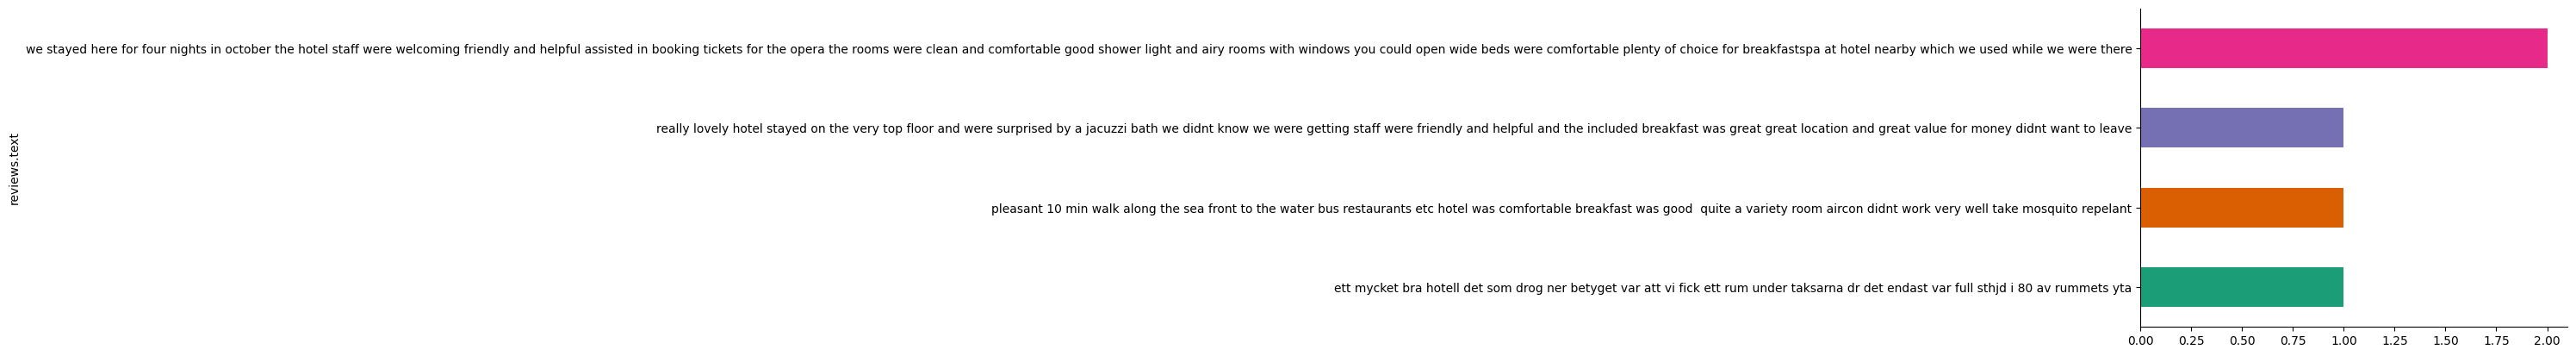

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('reviews.text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

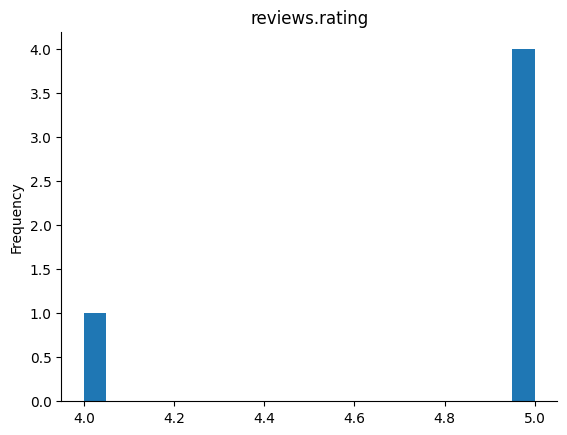

In [ ]:
from matplotlib import pyplot as plt
_df_0['reviews.rating'].plot(kind='hist', bins=20, title='reviews.rating')
plt.gca().spines[['top', 'right',]].set_visible(False)